
## Coagulation Basic 3: PMF vs. PDF

In this section, we will compare two fundamental approaches to modeling aerosol particle coagulation: the Probability Mass Function (PMF) and the Probability Density Function (PDF) methods. Both methods offer different perspectives on representing particle size distributions and calculating coagulation rates, which are critical for understanding how particles in aerosols interact and evolve over time.

### Probability Mass Function (PMF) vs. Probability Density Function (PDF)

- **PMF Representation**: The PMF method discretizes the particle size distribution into distinct bins, each representing a specific particle size or mass. This approach counts the number of particles within each bin, making it a straightforward method for tracking how particle populations change due to coagulation. PMF is particularly useful when dealing with discrete particle sizes or when particle number concentrations are of primary interest.

- **PDF Representation**: In contrast, the PDF method provides a continuous representation of the particle size distribution. Instead of counting particles in discrete bins, PDF describes the likelihood of finding particles within a given size range. This approach is well-suited for scenarios where a smooth distribution of particle sizes is expected or when dealing with very fine size resolutions.

### Objective

The objective of this comparison is to demonstrate how the choice between PMF and PDF representations affects the calculation of coagulation rates and the resulting particle size distributions. By applying both methods to a lognormal size distribution, we will analyze the differences in how each method handles the evolution of particle populations during coagulation.

### Approach

To facilitate this comparison, we will:
1. **Initialize Lognormal Distributions**: Generate lognormal particle size distributions using both PMF and PDF methods, ensuring that both distributions share the same initial parameters (e.g., mode, geometric standard deviation, and total particle concentration).
  
2. **Calculate Coagulation Kernel**: Compute the Brownian coagulation kernel using identical environmental conditions (e.g., temperature, pressure, collision efficiency) for both methods. This will allow us to isolate the effect of the distribution representation on the coagulation rates.

3. **Simulate Coagulation**: Simulate the coagulation process over several time steps for both PMF and PDF representations, tracking how the particle size distributions evolve and comparing the results.

By the end of this section, we aim to highlight the strengths and limitations of each method, providing insights into when and why one approach might be preferred over the other in aerosol research and modeling.


In [1]:
# Import necessary libraries

import numpy as np  # For numerical operations and array manipulations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import pandas as pd  # For data manipulation and analysis
from scipy.integrate import (
    trapezoid,
)  # For numerical integration using the trapezoidal rule

# Import specific modules from the particula package
from particula.next.dynamics.coagulation import brownian_kernel, rate
# The 'brownian_kernel' module calculates the Brownian coagulation kernel,
# which is used to determine coagulation rates between particles.
# The 'rate' module includes functions for calculating gain and loss rates during coagulation.
from particula.next.particles.properties.lognormal_size_distribution import (
    lognormal_pmf_distribution,
    lognormal_pdf_distribution,
)

# The 'lognormal_pmf_distribution' function generates a lognormal distribution
# represented as a Probability Mass Function (PMF).
# The 'lognormal_pdf_distribution' function generates a lognormal distribution
# represented as a Probability Density Function (PDF).
from particula.util.convert import distribution_convert_pdf_pms

# The 'distribution_convert_pdf_pms' function is used to convert PDF distributions
# to PMS (Particle Mass Spectrum) or vice versa for comparison purposes.

## Setting Up and Visualizing the Lognormal Distribution

In this section, we define the parameters for a lognormal particle size distribution and generate both Probability Density Function (PDF) and Probability Mass Function (PMF) representations. We then visualize these distributions to compare how each method represents particle concentrations across different size ranges.

### Distribution Parameters

We start by defining the key parameters for the lognormal distribution:

- **Mode**: The most probable particle size is set to 200 nanometers (200 nm or \(200 \times 10^{-9}\) meters).
- **Geometric Standard Deviation**: The spread of the distribution is controlled by a geometric standard deviation of 1.5.
- **Total Number Concentration**: The total concentration of particles is \(1 \times 10^6\) particles per cubic centimeter (cm³), which we convert to \(1 \times 10^{12}\) particles per cubic meter (m³) for our calculations.

We also define the radius bins, which span a wide range from 1 nanometer to 10 micrometers, using a logarithmic scale to capture the distribution across different particle sizes.

### Explanation

- **Parameter Definitions**: The mode, geometric standard deviation, and number concentration are clearly defined to set up the lognormal distribution.
- **Distribution Creation**: We generate both PDF and PMF representations of the distribution using the defined parameters and radius bins. This allows us to see how each method captures the particle concentrations.
- **Visualization**: The plot compares the PDF and PMF distributions on a logarithmic scale, which is essential for accurately displaying the wide range of particle sizes and concentrations. The use of log scales on both axes helps to highlight the differences between the two methods.

By visualizing these distributions side by side, we gain a better understanding of how the PDF and PMF methods differ in representing aerosol particle sizes and concentrations.

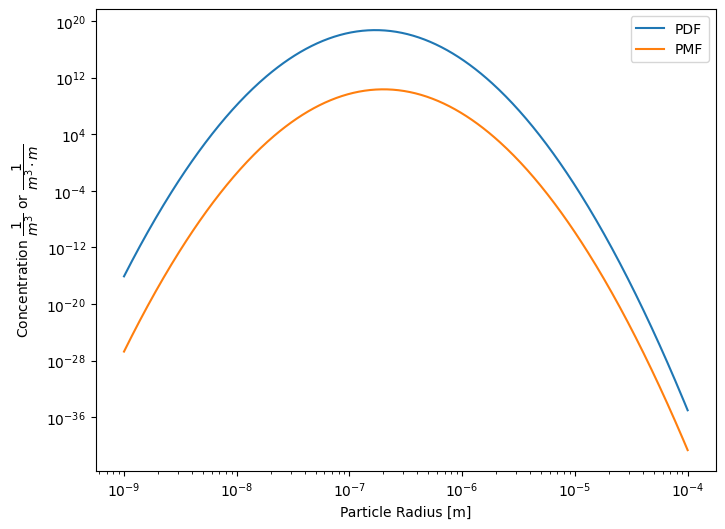

In [2]:
# Define distribution parameters
mode = np.array([200e-9])  # Mode of the distribution (200 nm)
std = np.array([1.5])  # Geometric standard deviation
number = np.array([1e6]) * 1e6  # 1e6 particles per cm^3 converted to m^3

# Define radius bins on a logarithmic scale from 1 nm to 10 μm
radius_bins = np.logspace(start=-9, stop=-4, num=500)

# Create the lognormal PDF distribution
distribution_pdf = lognormal_pdf_distribution(
    x_values=radius_bins,
    mode=mode,
    geometric_standard_deviation=std,
    number_of_particles=number,
)

# Create the lognormal PMF distribution
distribution_pmf = lognormal_pmf_distribution(
    x_values=radius_bins,
    mode=mode,
    geometric_standard_deviation=std,
    number_of_particles=number,
)

# Plot the PDF and PMF distributions for comparison
plt.figure(figsize=(8, 6))
plt.plot(radius_bins, distribution_pdf, label="PDF")
plt.plot(radius_bins, distribution_pmf, label="PMF")
plt.xlabel("Particle Radius [m]")
plt.ylabel(r"Concentration $\dfrac{1}{m^3}$ or $\dfrac{1}{m^3 \cdot m}$")
plt.xscale(
    "log"
)  # Logarithmic scale for the x-axis to capture wide size range
plt.yscale(
    "log"
)  # Logarithmic scale for the y-axis to highlight distribution differences
plt.legend()
plt.show()

## Rescaling PDF to PMF Representation

In this section, we convert the previously generated Probability Density Function (PDF) into a Probability Mass Function (PMF) to directly compare it with the original PMF distribution. This rescaling is necessary because PDF and PMF represent the distribution in different ways, and aligning them allows for a more accurate comparison.

### Rescaling the PDF

The conversion from PDF to PMF involves rescaling the distribution so that the integral of the PDF over each bin corresponds to the particle count in that bin, similar to what is represented in the PMF. This is done using the `distribution_convert_pdf_pms` function.


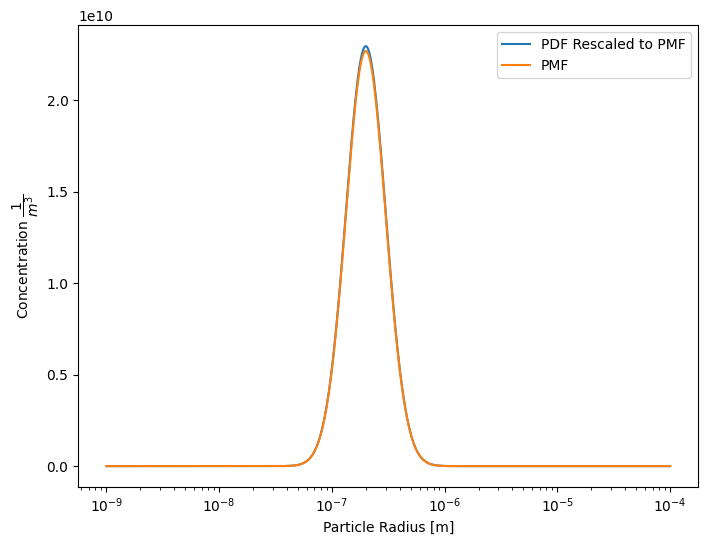

In [3]:
# Rescale the PDF to PMF
distribution_pdf_rescaled = distribution_convert_pdf_pms(
    x_array=radius_bins,
    distribution=distribution_pdf,
    to_pdf=False,  # Convert PDF to PMF
)

# Plot the rescaled PDF and the original PMF for comparison
plt.figure(figsize=(8, 6))
plt.plot(radius_bins, distribution_pdf_rescaled, label="PDF Rescaled to PMF")
plt.plot(radius_bins, distribution_pmf, label="PMF")
plt.xlabel("Particle Radius [m]")
plt.ylabel("Concentration $\dfrac{1}{m^3}$")
plt.xscale("log")  # Use a logarithmic scale for the x-axis
# plt.yscale('log')  # Optionally use a logarithmic scale for the y-axis
plt.legend()
plt.show()

## Rescaling PMF to PDF Representation

After converting the PDF to a PMF for direct comparison, we now perform the reverse operation: rescaling the PMF to a PDF. This allows us to compare the original PDF with the PMF that has been adjusted to match the continuous representation of particle concentrations.

### Rescaling the PMF

To rescale the PMF to a PDF, we use the `distribution_convert_pdf_pms` function. This conversion ensures that the PMF, which originally represented discrete particle counts in each bin, is transformed into a continuous probability density function, aligning it with the original PDF format.

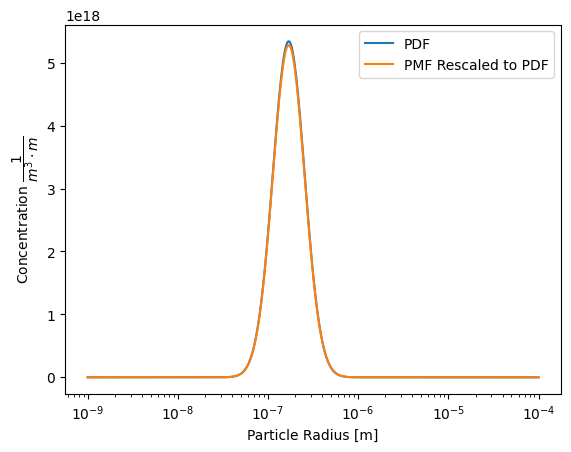

In [4]:
# Rescale the PMF to PDF
distribution_pmf_rescaled = distribution_convert_pdf_pms(
    x_array=radius_bins,
    distribution=distribution_pmf,
    to_pdf=True,  # Convert PMF to PDF
)

# Plot the original PDF and the rescaled PMF for comparison
plt.figure()
plt.plot(radius_bins, distribution_pdf, label="PDF")
plt.plot(radius_bins, distribution_pmf_rescaled, label="PMF Rescaled to PDF")
plt.xlabel("Particle Radius [m]")
plt.ylabel("Concentration $\dfrac{1}{m^3 \cdot m}$")
plt.xscale("log")  # Logarithmic scale for the x-axis to capture size range
plt.legend()
plt.show()

## Verifying Number Concentration through Integration

In this section, we validate the consistency of the number concentration across different representations (PDF and PMF) by performing numerical integrations and summations. This step ensures that the transformations between PDF and PMF maintain the expected total particle concentrations.

### Integrating Number Concentration for PDF

We first integrate the original PDF distribution and the PMF that has been rescaled to a PDF to check if they yield the same total number concentration. The trapezoidal rule is used for this integration.

In [5]:
# Integrate the original PDF to calculate the total number concentration
number_concentration_pdf = trapezoid(distribution_pdf, x=radius_bins)

# Integrate the PMF rescaled to PDF to calculate the total number concentration
number_concentration_pmf_rescaled = trapezoid(
    distribution_pmf_rescaled, x=radius_bins
)

# Print the results to compare
print(f"Number concentration from PDF: {number_concentration_pdf}")
print(
    f"Number concentration from PMF rescaled to PDF: {number_concentration_pmf_rescaled}"
)

Number concentration from PDF: 1000000000000.0
Number concentration from PMF rescaled to PDF: 988596064185.8999


### Verifying Number Concentration for PMF

Next, we sum the original PMF distribution and the PDF that has been rescaled to a PMF. Summing these values directly gives the total number concentration, allowing us to verify consistency across the different representations.

In [6]:
# Sum the original PMF to calculate the total number concentration
number_concentration_pmf = distribution_pmf.sum()

# Sum the PDF rescaled to PMF to calculate the total number concentration
number_concentration_pdf_rescaled = distribution_pdf_rescaled.sum()

# Print the results to compare
print(f"Number concentration from PMF: {number_concentration_pmf}")
print(
    f"Number concentration from PDF rescaled to PMF: {number_concentration_pdf_rescaled}"
)

Number concentration from PMF: 1000000000000.0
Number concentration from PDF rescaled to PMF: 1011535485753.2141


## Explanation of Small Errors in Number Concentration Calculations

When comparing the total number concentrations derived from the PDF and PMF representations, as well as their rescaled versions, we observe small discrepancies between the values.

### Sources of Error

These small differences arise from several factors inherent in the process of transforming and integrating discrete and continuous distributions:

1. **Numerical Approximation**:
   - The integration of the PDF and the summation of the PMF involve numerical approximations, which can introduce small errors. The trapezoidal rule, used for integrating the PDF, is an approximation method that may not perfectly capture the area under the curve, especially when dealing with finely spaced bins or distributions that change rapidly in certain regions.

2. **Discretization of Continuous Distributions**:
   - When rescaling a PDF to a PMF or vice versa, we are essentially converting a continuous function into a discrete one, or vice versa. This discretization process can lead to slight inconsistencies because the continuous distribution is approximated by a finite number of bins. The exact alignment of these bins with the underlying distribution is rarely perfect, leading to small errors.

3. **Cumulative Effect of Small Differences**:
   - Small differences across many bins can accumulate, resulting in a noticeable discrepancy when summing or integrating over the entire distribution. Even if each individual difference is minute, the total error can be more significant when considering the entire size range.

### Significance of the Errors

While these errors are small relative to the total number concentration (less than 1% in this case), they are important to acknowledge when performing precision calculations. In practical applications, these discrepancies are often considered acceptable, but they highlight the importance of understanding the limitations of numerical methods and transformations between different types of distributions.

### Mitigating the Errors

- **Increasing the Number of Bins**: Using a higher resolution (more bins) can help reduce the error by more closely approximating the continuous distribution.
- **Refining the Interpolation Method**: More sophisticated interpolation methods may provide better alignment between the PDF and PMF during the rescaling process, further minimizing errors.
- **Error Analysis**: Incorporating error analysis into the calculations can help quantify and understand the impact of these discrepancies on the overall results.

Overall, these small errors are a natural consequence of the numerical techniques used and do not significantly detract from the accuracy of the coagulation modeling. However, being aware of their existence is crucial for interpreting results with a full understanding of the underlying processes.

## Calculating the Brownian Coagulation Kernel

Before comparing the coagulation rates between the Probability Mass Function (PMF) and Probability Density Function (PDF) representations, it is essential to calculate the Brownian coagulation kernel. The kernel quantifies the rate at which particles of different sizes collide and coagulate due to Brownian motion. This matrix is a key component in determining how quickly particles in an aerosol system merge to form larger particles.

### Calculation of Particle Masses

To calculate the coagulation kernel, we first need to determine the mass of particles in each size bin. The mass of a particle is calculated using the formula for the volume of a sphere:

$$
m = \frac{4}{3} \pi r^3 \times 1000 \, \text{kg/m}^3
$$

where $r$  is the particle radius and 1000 kg/m³ is the assumed density of the particles.

In [7]:
# Calculate the mass of particles for each size bin
mass_bins = 4 / 3 * np.pi * radius_bins**3 * 1e3  # kg

# Calculate the Brownian coagulation kernel matrix
kernel = brownian_kernel.brownian_coagulation_kernel_via_system_state(
    radius_particle=radius_bins,
    mass_particle=mass_bins,
    temperature=293.15,  # Temperature in Kelvin (20°C)
    pressure=101325,  # Pressure in Pascals (1 atm)
    alpha_collision_efficiency=1.0,  # Assume perfect collision efficiency
)

## Ensuring Volume Conservation in Coagulation Rates for PDF

In aerosol coagulation processes, one check is to ensure that the total particle volume is conserved. While the number of particles decreases as they coagulate to form larger particles, the total volume of material should remain constant (assuming no other processes such as condensation or evaporation are occurring).

In this section, we calculate the gain, loss, and net coagulation rates using the PDF representation and verify that the total volume remains consistent.

### Calculating Coagulation Rates

We start by calculating the gain, loss, and net coagulation rates based on the initial PDF concentration. These rates describe how particles in different size bins gain or lose mass due to coagulation.

### Converting to Volume Distribution

To verify volume conservation, we convert the particle concentration rates (gain, loss, and net) into volume rates by multiplying them by the volume of particles in each size bin. The volume of a particle is given by:

$$
V = \frac{4}{3} \pi r^3
$$

In [8]:
concentration_0 = distribution_pdf

# Calculate gain and loss rates for the PDF
gain_pdf = rate.continuous_gain(
    radius=radius_bins,
    concentration=concentration_0,
    kernel=kernel,
)
loss_pdf = rate.continuous_loss(
    radius=radius_bins, concentration=concentration_0, kernel=kernel
)
net_pdf = gain_pdf - loss_pdf

# Convert gain, loss, and net rates to volume distribution
gain_volume = gain_pdf * 4 / 3 * np.pi * radius_bins**3
loss_volume = loss_pdf * 4 / 3 * np.pi * radius_bins**3
net_volume = net_pdf * 4 / 3 * np.pi * radius_bins**3

# Integrate the gain, loss, and net rates to get the total volume
gain_total_volume = trapezoid(gain_volume, x=radius_bins)
loss_total_volume = trapezoid(loss_volume, x=radius_bins)
net_total_volume = trapezoid(net_volume, x=radius_bins)

# Print the results to verify volume conservation
print(f"Gain total volume: {gain_total_volume}")
print(f"Loss total volume: {loss_total_volume}")
print(f"Net total volume: {net_total_volume}")

Gain total volume: 6.75165104833036e-11
Loss total volume: 6.752244952802652e-11
Net total volume: -5.9390447229141716e-15


## Ensuring Volume Conservation in Coagulation Rates for PMF

Similar to the PDF representation, it is essential to ensure that the total particle volume is conserved in the PMF (Probability Mass Function) representation during the coagulation process. The number of particles may decrease as they coagulate into larger particles, but the total volume of particles should remain constant if no other processes (like condensation or evaporation) are involved.

### Calculating Coagulation Rates for PMF

We calculate the gain, loss, and net coagulation rates for the initial PMF concentration. These rates describe how particle concentrations change in each size bin due to coagulation.


In [9]:
# Initial concentration for the PMF distribution
concentration_0_pmf = distribution_pmf

# Calculate gain and loss rates for the PMF
gain_pmf = rate.discrete_gain(
    concentration=concentration_0_pmf,
    kernel=kernel,
)
loss_pmf = rate.discrete_loss(concentration=concentration_0_pmf, kernel=kernel)
net_pmf = gain_pmf - loss_pmf

# Convert gain, loss, and net rates to volume distribution
gain_volume_pmf = gain_pmf * 4 / 3 * np.pi * radius_bins**3
loss_volume_pmf = loss_pmf * 4 / 3 * np.pi * radius_bins**3
net_volume_pmf = net_pmf * 4 / 3 * np.pi * radius_bins**3

# Sum the gain, loss, and net volumes
gain_total_volume_pmf = gain_volume_pmf.sum()
loss_total_volume_pmf = loss_volume_pmf.sum()
net_total_volume_pmf = net_volume_pmf.sum()

# Print the results to verify volume conservation
print(f"Gain total volume PMF: {gain_total_volume_pmf}")
print(f"Loss total volume PMF: {loss_total_volume_pmf}")
print(f"Net total volume PMF: {net_total_volume_pmf}")

Gain total volume PMF: 6.069056561568663e-11
Loss total volume PMF: 6.75224495280265e-11
Net total volume PMF: -6.8318839123398844e-12


## Comparing Gain and Loss Rates Between PDF and PMF Representations

To understand the differences and similarities between the PDF and PMF representations in the context of particle coagulation, we convert the PMF gain and loss rates to their corresponding PDF forms. This allows for a direct comparison of how each representation handles particle concentration changes across different size ranges.

### Converting PMF to PDF

The gain and loss rates calculated for the PMF representation are converted to PDF using the `distribution_convert_pdf_pms` function. This conversion enables us to plot and compare the results on the same scale and with the same units as the original PDF.

### Explanation

- **Comparison of Gain and Loss Rates**: The first plot compares the gain and loss rates between the original PDF and the converted PMF. By plotting these on the same axes, we can observe how closely the PMF (when converted to PDF) matches the behavior of the original PDF. The solid lines represent the PDF results, while the dashed lines represent the PMF converted to PDF.

- **Comparison of Net Rates**: The second plot focuses on the net gain and loss rates, which are calculated as the difference between the gain and loss rates. This plot helps in understanding whether the differences in the gain and loss rates between the PDF and converted PMF lead to any significant discrepancies in the overall net rate of particle concentration change.

### Interpretation

- **Matching Behavior**: Ideally, the converted PMF should closely match the original PDF, indicating that both representations handle coagulation rates similarly. Any differences observed in the plots can provide insights into the nuances of each method, such as how they handle small particle sizes or how numerical approximations might affect the results.
  
- **Significance of Differences**: While small differences between the PDF and converted PMF may arise due to numerical methods, these differences can highlight the strengths and limitations of each approach in representing particle size distributions and their evolution during coagulation.


### PMF Gain Error

The PMF gain rate is slightly off, and we are still looking into the issue. We will update this section once we have resolved the discrepancy.


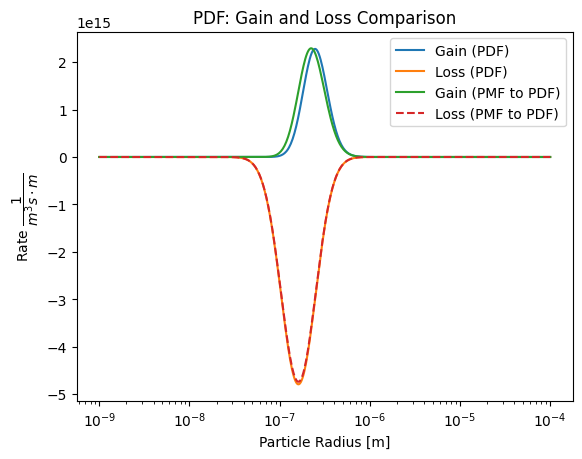

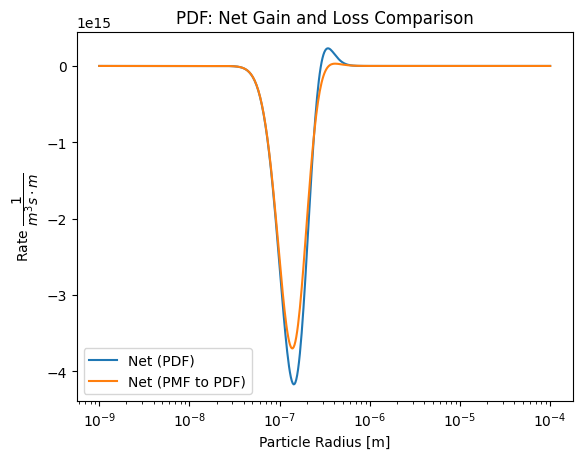

In [10]:
# Convert PMF gain and loss rates to PDF
gain_pmf_to_pdf = distribution_convert_pdf_pms(
    x_array=radius_bins, distribution=gain_pmf, to_pdf=True
)
loss_pmf_to_pdf = distribution_convert_pdf_pms(
    x_array=radius_bins, distribution=loss_pmf, to_pdf=True
)
net_pmf_to_pdf = gain_pmf_to_pdf - loss_pmf_to_pdf

# Plot the gain and loss rates for both PDF and converted PMF
plt.figure()
plt.plot(radius_bins, gain_pdf, label="Gain (PDF)")
plt.plot(radius_bins, -1 * loss_pdf, label="Loss (PDF)")
plt.plot(radius_bins, gain_pmf_to_pdf, label="Gain (PMF to PDF)")
plt.plot(
    radius_bins,
    -1 * loss_pmf_to_pdf,
    label="Loss (PMF to PDF)",
    linestyle="--",
)
plt.xlabel("Particle Radius [m]")
plt.ylabel("Rate $\dfrac{1}{m^3 s \cdot m}$")
plt.xscale("log")
plt.title("PDF: Gain and Loss Comparison")
plt.legend()
plt.show()

# Plot the net gain and loss rates for both PDF and converted PMF
plt.figure()
plt.plot(radius_bins, net_pdf, label="Net (PDF)")
plt.plot(radius_bins, net_pmf_to_pdf, label="Net (PMF to PDF)")
plt.xlabel("Particle Radius [m]")
plt.ylabel("Rate $\dfrac{1}{m^3 s \cdot m}$")
plt.xscale("log")
plt.title("PDF: Net Gain and Loss Comparison")
plt.legend()
plt.show()

## Simulating Coagulation Over Time Using PDF

In this section, we simulate the evolution of a particle size distribution over time as particles undergo coagulation, using the Probability Density Function (PDF) representation. The simulation tracks how the distribution changes at different time steps, providing insight into how the particle population evolves under the influence of Brownian coagulation.

### Simulation Setup

- **Initial Distribution**: The simulation begins with the initial particle size distribution (`distribution_0`), which is based on the PDF calculated earlier.
- **Time Array**: The simulation runs over a time span from 0 to 1000 seconds, with 50 discrete time steps. The time interval between each step is calculated to update the distribution as coagulation progresses.

In [11]:
# Initial distribution for the simulation
distribution_0 = distribution_pdf
distribution_i = distribution_0

# Define the time array for the simulation
time_array = np.linspace(
    start=0, stop=1000, num=50
)  # Time span of 1000 seconds
time_interval = (
    time_array[1] - time_array[0]
)  # Time interval between each step

# Array to store the distribution at each time step
distribution_time = np.zeros([len(time_array), len(distribution_0)])

# Simulate the coagulation process over time
for i, dpa in enumerate(time_array):
    if i > 0:
        # Calculate coagulation gain and loss at the current time step
        coag_gain_i = rate.continuous_gain(
            radius=radius_bins,
            concentration=distribution_i,
            kernel=kernel,
        )
        coag_loss_i = rate.continuous_loss(
            radius=radius_bins, concentration=distribution_i, kernel=kernel
        )

        # Calculate the net change in distribution due to coagulation
        net_change = (coag_gain_i - coag_loss_i) * time_interval
        distribution_i = distribution_i + net_change

        # Ensure no negative concentrations (set to zero if less than zero)
        distribution_i[distribution_i < 0] = 0

    # Store the updated distribution for the current time step
    distribution_time[i, :] = distribution_i

## Visualizing the Evolution of the Particle Size Distribution

After simulating the coagulation process over time, we can visualize how the particle size distribution evolves at different time steps. This plot compares the initial distribution with the distribution at a mid-point and at the end of the simulation, highlighting the changes that occur due to coagulation.

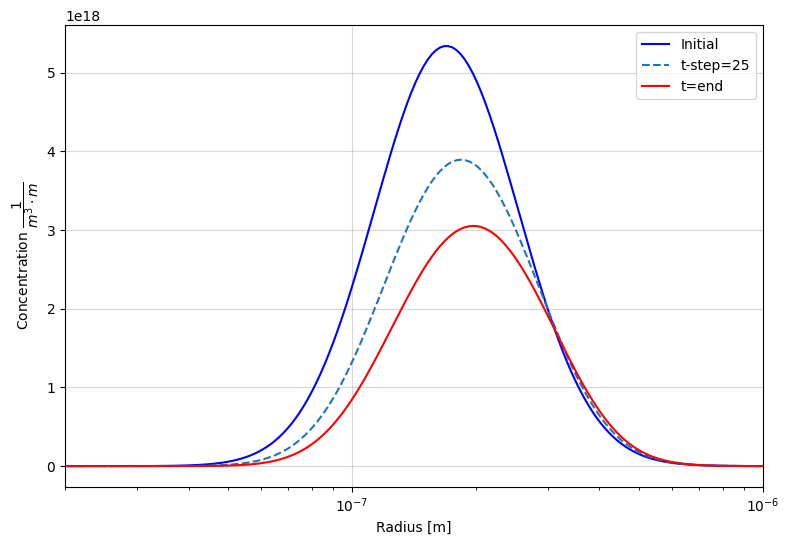

In [12]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=[9, 6])

# Define the radius bins
radius = radius_bins

# Plot the initial distribution, mid-point distribution, and final distribution
ax.semilogx(
    radius, distribution_0, "-b", label="Initial"
)  # Initial distribution
ax.semilogx(
    radius, distribution_time[25, :], "--", label="t-step=25"
)  # Mid-point
ax.semilogx(
    radius, distribution_time[-1, :], "-r", label="t=end"
)  # Final distribution

# Set the limits for the x-axis to focus on the relevant size range
ax.set_xlim([2e-8, 1e-6])

# Add legend to distinguish between different time steps
ax.legend()

# Label the y-axis to indicate concentration units
ax.set_ylabel(r"Concentration $\dfrac{1}{m^3 \cdot m}$")

# Label the x-axis for particle radius
ax.set_xlabel("Radius [m]")

# Add grid lines for better readability
ax.grid(True, alpha=0.5)

# Show the plot
plt.show()

## Visualizing Particle Size Distribution Evolution Over Time

To further understand how the particle size distribution evolves during the coagulation process, we can create a 2D image plot. In this plot, time is represented on the x-axis, particle size (radius) on the y-axis, and the concentration is color-coded. This type of plot provides a comprehensive view of how both small and large particles change in concentration over the entire simulation period.


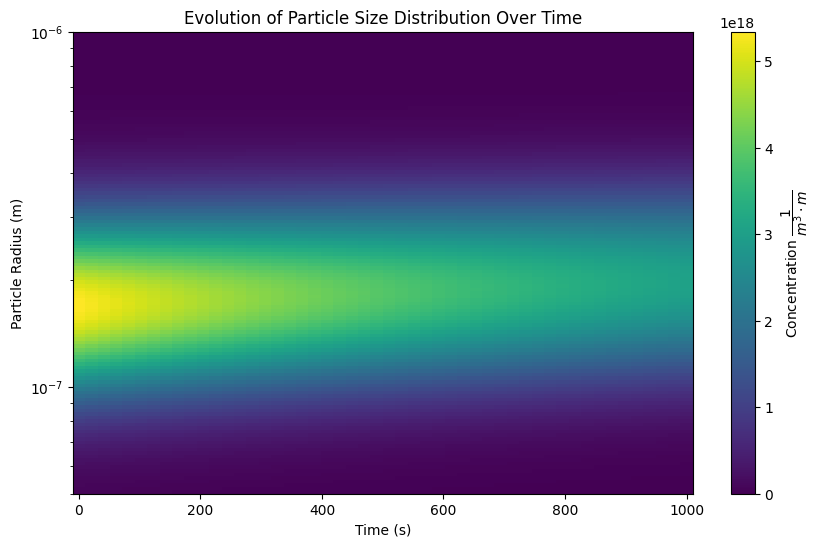

In [13]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create an image plot (2D histogram) with time on the x-axis, radius on the y-axis, and concentration as color
c = ax.pcolormesh(
    time_array,
    radius_bins,
    distribution_time.T,
    shading="auto",
    cmap="viridis",
)

# Set the y-axis to a logarithmic scale to capture the wide range of particle sizes
ax.set_ylim([5e-8, 1e-6])
ax.set_yscale("log")

# Label the axes
ax.set_xlabel("Time (s)")
ax.set_ylabel("Particle Radius (m)")

# Add a color bar to indicate the concentration levels
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"Concentration $\dfrac{1}{m^3 \cdot m}$")

# Add a title to the plot
ax.set_title("Evolution of Particle Size Distribution Over Time")

# Show the plot
plt.show()

## Add PMF simulation, comparison, and summary